In [4]:
# Meaen reversion rely on reasoing opposite of momentum based strategies
# If an instrument has performed too well relative to its trend, it is shorted and vice versa
# momentum strategies assume positive correlation between returns, mean-reversion assume negative correlation

# Mean reversion refers to a tendency of asset prices to return to a trend path

In [5]:
# SMA can be used as a proxy for trend path
# IDea is to define a threshold for distance between current stock price and the SMA which signals to long 
# or short position

In [6]:
# GLD - SPDR Gold Shares ETF - Based on physical gold
# GDX - VanEck Vectors Gold Miners ETF - invsts in equity products to track NYSE Arca Gold Miners Index

# One would expect these 2 would be good candidates for mean reversion since both are based on gold price

In [7]:
import pandas as pd
import numpy as np

raw = pd.read_csv(
    'http://hilpisch.com/pyalgo_eikon_eod_data.csv',
    index_col=0, 
    parse_dates=True
).dropna()

data = pd.DataFrame(raw["GDX"])
data.rename(columns={"GDX": "price"}, inplace=True)
data["returns"] = np.log(data["price"]/data["price"].shift(1))

In [8]:
# Define a 25 Short-Term Moving Average, calculate SMA for Trend Path
SMA = 25
data["SMA"] = data["price"].rolling(SMA).mean()

In [9]:
# Set a threshold of 3.5 for signal generation to be used in mean reversion
threshold = 3.5

In [10]:
# Caluclate distance from current price to trend path
data["distance"] = data["price"] - data["SMA"]

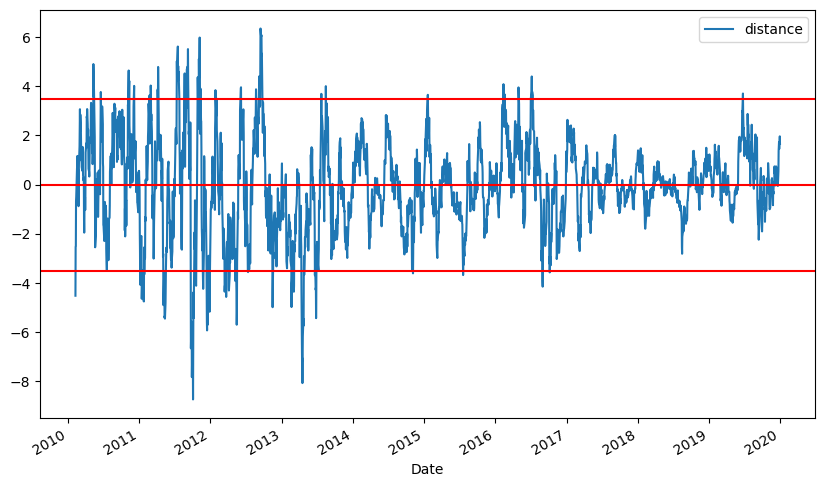

In [11]:
%matplotlib inline
from pylab import mpl, plt

data["distance"].dropna().plot(figsize=(10,6), legend=True)
plt.axhline(threshold, color='r')
plt.axhline(-threshold, color='r')
plt.axhline(0, color='r')

In [44]:
# if distance value is greater than threshold go short
data['position'] = np.where(data['distance'] > threshold, -1, np.nan)

In [45]:
# if distance value is lower than negative threshold go long
data['position'] = np.where(data['distance'] < -threshold, 1, data['position'])

In [46]:
# if there is a change in sign of distance, go market neutral
data['position'] = np.where(data['distance'] * data['distance'].shift(1) < 0, 0, data['position'])

In [47]:
# fill all forward nans as 0
data['position'] = data['position'].ffill().fillna(0)

<Axes: xlabel='Date'>

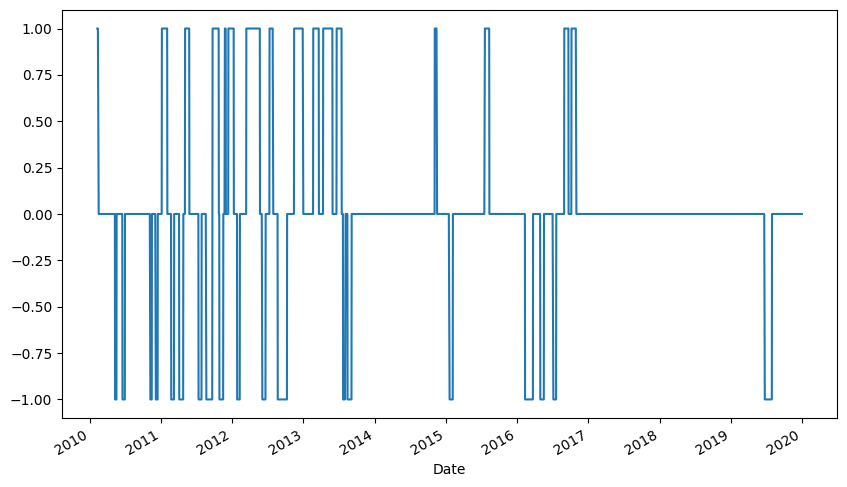

In [48]:
data['position'].iloc[SMA:].plot(ylim=[-1.1,1.1], figsize=(10,6))

In [49]:
# apply strategy to get long term returns
data['strategy'] = data['position'].shift(1) * data['returns']

<Axes: xlabel='Date'>

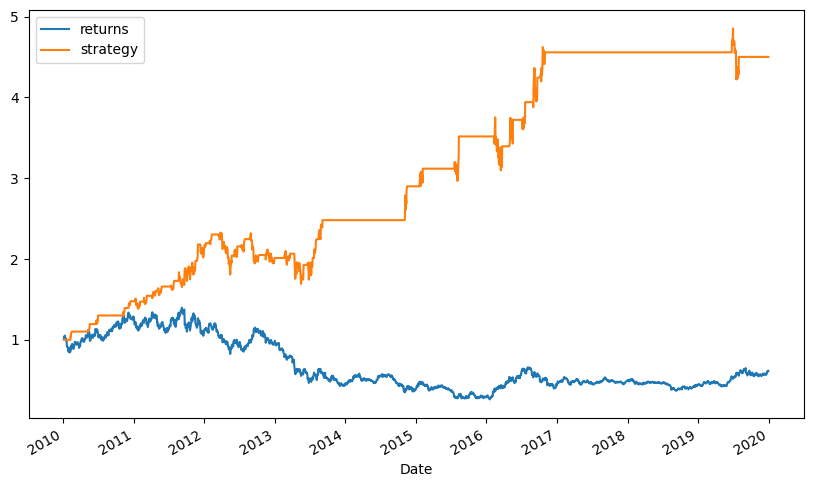

In [50]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))